### Import Required Libraries

This section imports all the necessary Python libraries used for data manipulation, numerical computation, and visualization.
pandas & numpy : Data handling and numerical operations  
matplotlib & seaborn: Static data visualization  
plotly: Interactive visualizations  
FuncFormatter: Custom formatting for chart axes  
Pathlib: File and path management

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path

### Load Dataset and Initial Exploration

The dataset is loaded from a CSV file into a pandas DataFrame.  
Initial exploration helps understand the structure, size, and basic content of the data.

In [60]:
dt=pd.read_csv('advanced_ecommerce_sales_with_customers.csv')
dt.head()

,order_id,customer_id,order_date,customer_segment,region,product_category,product_subcategory,unit_price,quantity,discount,payment_method,shipping_days,gross_sales,discount_amount,net_sales,cost,profit
0,1,103,2021-01-01 00:00:00.000000000,Small Business,East,Furniture,Outdoor,615.59,1,0.34,Cash on Delivery,2,615.59,209.3006,406.2894,522.990314,-116.700914
1,2,436,2021-01-01 07:00:33.846769353,Enterprise,West,Sports,Shirts,439.51,5,0.28,Credit Card,3,2197.55,615.3140,1582.2360,1866.985111,-284.749111
2,3,861,2021-01-01 14:01:07.693538707,Consumer,Central,Sports,Dry Food,657.76,1,0.36,Debit Card,13,657.76,236.7936,420.9664,558.816922,-137.850522
3,4,271,2021-01-01 21:01:41.540308061,Small Business,East,Sports,Sofa,1258.85,3,0.10,UPI,13,3776.55,377.6550,3398.8950,3208.465165,190.429835
4,5,107,2021-01-02 04:02:15.387077415,Small Business,North,Electronics,Fresh Veg,349.45,9,0.37,Debit Card,10,3145.05,1163.6685,1981.3815,2671.958101,-690.576601


In [61]:
dt.shape

(5000, 17)

In [62]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             5000 non-null   int64  
 1   customer_id          5000 non-null   int64  
 2   order_date           5000 non-null   object 
 3   customer_segment     5000 non-null   object 
 4   region               5000 non-null   object 
 5   product_category     5000 non-null   object 
 6   product_subcategory  5000 non-null   object 
 7   unit_price           5000 non-null   float64
 8   quantity             5000 non-null   int64  
 9   discount             5000 non-null   float64
 10  payment_method       5000 non-null   object 
 11  shipping_days        5000 non-null   int64  
 12  gross_sales          5000 non-null   float64
 13  discount_amount      5000 non-null   float64
 14  net_sales            5000 non-null   float64
 15  cost                 5000 non-null   f

In [63]:
dt.columns

Index(['order_id', 'customer_id', 'order_date', 'customer_segment', 'region',
       'product_category', 'product_subcategory', 'unit_price', 'quantity',
       'discount', 'payment_method', 'shipping_days', 'gross_sales',
       'discount_amount', 'net_sales', 'cost', 'profit'],
      dtype='object')

### Data Quality Checks

This section checks:
- Missing values in each column  
- Duplicate records in the dataset  

Ensuring clean data is critical before feature engineering and analysis.


In [64]:
dt.isnull().sum()

order_id               0
customer_id            0
order_date             0
customer_segment       0
region                 0
product_category       0
product_subcategory    0
unit_price             0
quantity               0
discount               0
payment_method         0
shipping_days          0
gross_sales            0
discount_amount        0
net_sales              0
cost                   0
profit                 0
dtype: int64

In [65]:
dt.duplicated().sum()

np.int64(0)

### Identify Numerical and Categorical Features

- Numerical columns are automatically detected using data types  
- Key categorical columns are explicitly defined for segmentation and grouping


In [66]:
numeric_col=dt.select_dtypes(['int64','float64']).columns
numeric_col

Index(['order_id', 'customer_id', 'unit_price', 'quantity', 'discount',
       'shipping_days', 'gross_sales', 'discount_amount', 'net_sales', 'cost',
       'profit'],
      dtype='object')

In [67]:
category_col = ['customer_segment','region','product_category','payment_method']

In [68]:
dt['order_date'].dtypes

dtype('O')

In [69]:
dt['order_date'] = pd.to_datetime(dt['order_date'], errors='coerce')

In [70]:
dt['order_date'].dtype

dtype('<M8[ns]')

### Date Conversion and Feature Engineering

The `order_date` column is converted to a datetime format.  
Multiple time-based features are derived to support time-series analysis:
- Year
- Month
- Year-Month
- Week
- Quarter

In [71]:
dt['order_year'] = dt['order_date'].dt.year
dt['order_month'] = dt['order_date'].dt.to_period('M').astype(str)
dt['year_month'] = dt['order_date'].dt.to_period('M')
dt['month'] = dt['order_date'].dt.month
dt['order_week'] = dt['order_date'].dt.isocalendar().week
dt['order_quarter'] = dt['order_date'].dt.to_period('Q').astype(str)

### Sales and Profit Feature Engineering

This section creates business-critical metrics:
- Gross Sales
- Discount Amount
- Net Sales
- Cost (generated if missing)
- Profit and Profit Margin
- High-Value Customer Flag
- Sales per Day

These features enable profitability and customer value analysis.

In [72]:
dt['gross_sales'] = dt['unit_price'] * dt['quantity']
dt['discount_amount'] = dt['gross_sales'] * dt['discount']
dt['net_sales'] = dt['gross_sales'] - dt['discount_amount']
if 'cost' not in dt.columns:
    dt['cost'] = dt['gross_sales'] * np.random.uniform(0.5, 0.9, size=len(df))
dt['profit'] = dt['net_sales'] - dt['cost']
dt['profit_margin'] = dt['profit'] / (dt['net_sales'].replace(0, np.nan))
dt['is_high_value'] = (dt['net_sales'] > dt['net_sales'].quantile(0.9)).astype(int)
dt['sales_per_day'] = dt['net_sales'] / dt['shipping_days'].replace(0, 1)

### Utility Function for Axis Formatting

A custom formatter is defined to display large numeric values with thousand separators in plots.

In [73]:
def thousands(x, pos):
    'The two args are the value and tick position'
    return f'{int(x):,}'

In [74]:
monthly = dt.groupby(dt['year_month']).agg(net_sales=('net_sales','sum'), profit=('profit','sum'), quantity=('quantity','sum')).reset_index()
monthly['year_month_str'] = monthly['year_month'].astype(str)

### Monthly Net Sales and Profit Trend

Aggregates net sales, profit, and quantity at a monthly level.  
A line chart visualizes business growth and profitability trends over time.

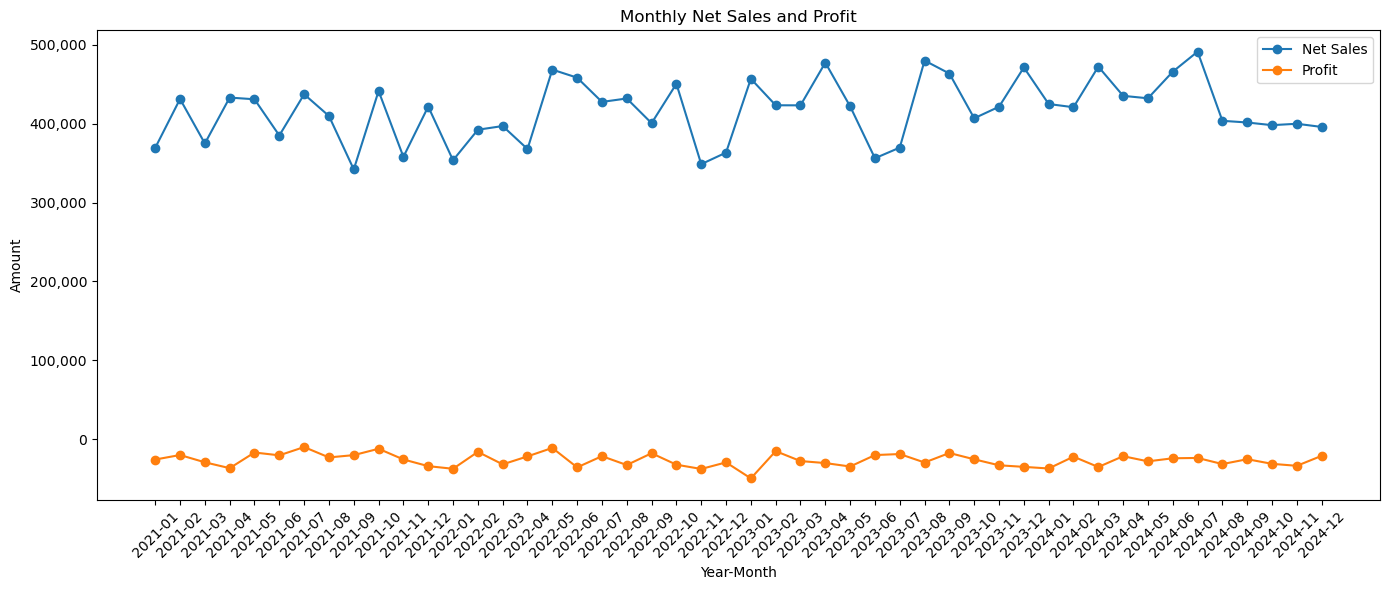

In [75]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(monthly['year_month_str'], monthly['net_sales'], marker='o', label='Net Sales')
ax.plot(monthly['year_month_str'], monthly['profit'], marker='o', label='Profit')
ax.set_title('Monthly Net Sales and Profit')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Amount')
ax.tick_params(axis='x', rotation=45)
ax.yaxis.set_major_formatter(FuncFormatter(thousands))
ax.legend()
plt.tight_layout()


plt.savefig('monthly_sales_profit.png', dpi=300, bbox_inches='tight')
plt.show()

### Profit Heatmap: Region vs Product Category

A pivot table summarizes profit by region and product category.  
A heatmap visually highlights high- and low-performing combinations.

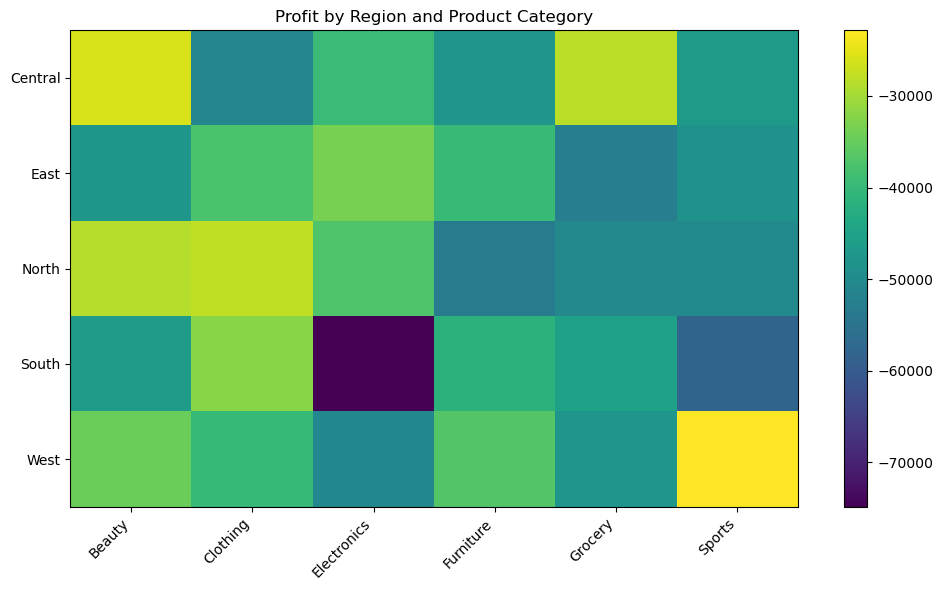

In [86]:
pivot = dt.pivot_table(index='region', columns='product_category', values='profit', aggfunc='sum').fillna(0)
fig, ax = plt.subplots(figsize=(10,6))
cax = ax.imshow(pivot.values, aspect='auto')
ax.set_yticks(range(len(pivot.index))); ax.set_yticklabels(pivot.index)
ax.set_xticks(range(len(pivot.columns))); ax.set_xticklabels(pivot.columns, rotation=45, ha='right')
ax.set_title('Profit by Region and Product Category')
fig.colorbar(cax, ax=ax, orientation='vertical')
plt.tight_layout()


plt.savefig('profit by region & category.png', dpi=300, bbox_inches='tight')
plt.show()

### Revenue Sunburst Analysis

An interactive sunburst chart displays hierarchical revenue contribution:
Customer Segment → Product Category → Product Subcategory

In [77]:
sun = dt.groupby(['customer_segment','product_category','product_subcategory']).net_sales.sum().reset_index()
fig = px.sunburst(sun, path=['customer_segment','product_category','product_subcategory'], values='net_sales', title='Revenue Sunburst: Segment → Category → Subcategory')


plt.savefig('revenue_sunburst.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

### Pareto Analysis: Category Contribution to Sales

This chart identifies the most revenue-generating product categories.  
The cumulative percentage line helps apply the 80/20 principle.


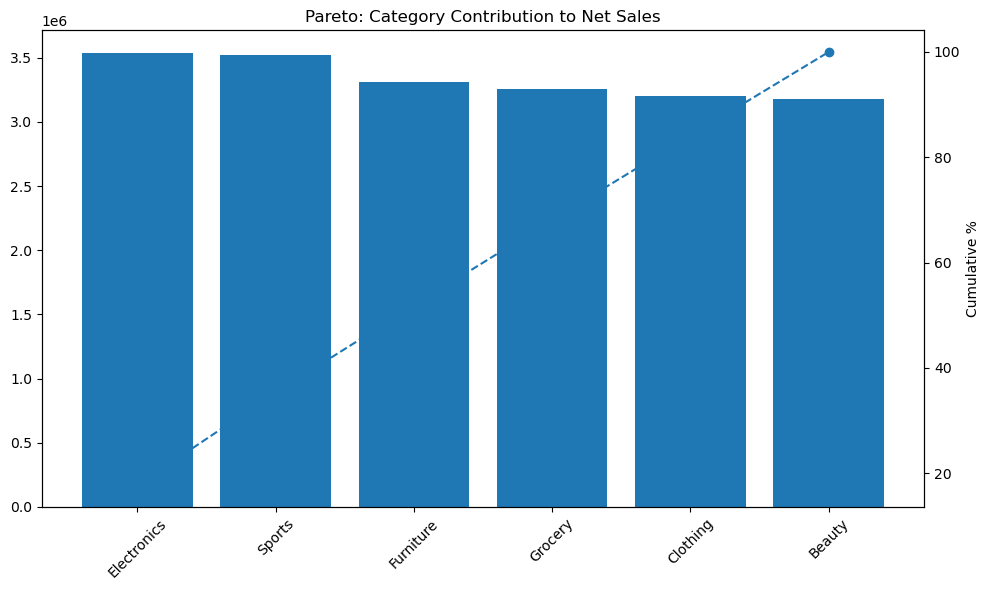

In [78]:
cat = dt.groupby('product_category').net_sales.sum().sort_values(ascending=False).reset_index()
cat['cumperc'] = cat['net_sales'].cumsum() / cat['net_sales'].sum() * 100
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(cat['product_category'], cat['net_sales'])
ax2 = ax.twinx()
ax2.plot(cat['product_category'], cat['cumperc'], marker='o', linestyle='--')
ax2.set_ylabel('Cumulative %')
ax.set_title('Pareto: Category Contribution to Net Sales')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

plt.savefig('cat_dist vs net_sales.png', dpi=300, bbox_inches='tight')
plt.show()

### Discount vs Profit Relationship

A scatter plot with a regression line explores the relationship between discounts and profit.  
This helps assess whether higher discounts negatively impact profitability.


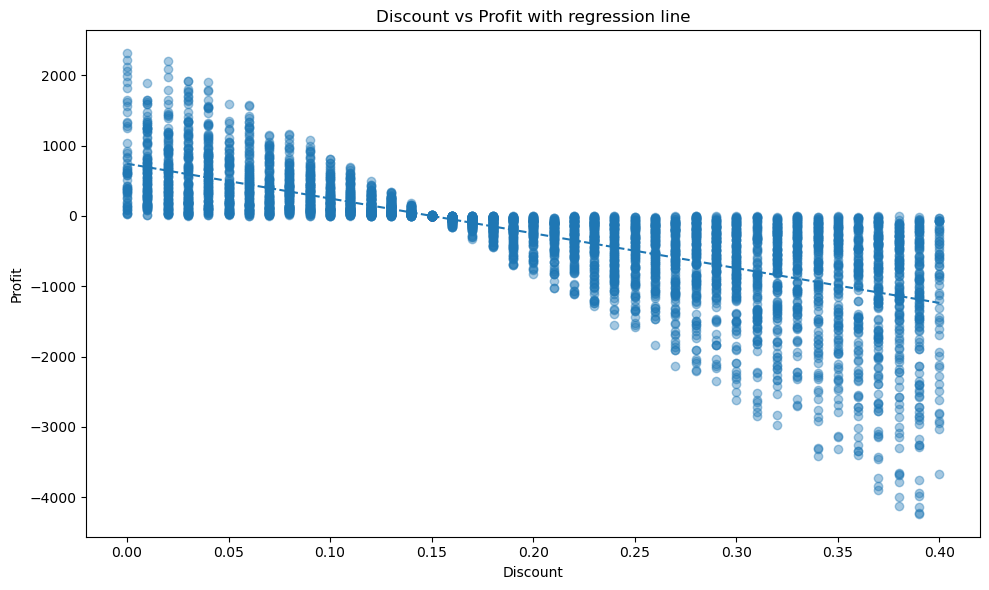

In [79]:
x = dt['discount'].fillna(0)
y = dt['profit'].fillna(0)
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x, y, alpha=0.4)
m, b = np.polyfit(x, y, 1)
xs = np.linspace(x.min(), x.max(), 100)
ax.plot(xs, m*xs + b, linestyle='--')
ax.set_xlabel('Discount')
ax.set_ylabel('Profit')
ax.set_title('Discount vs Profit with regression line')
plt.tight_layout()

plt.savefig('dis vs profit.png', dpi=300, bbox_inches='tight')
plt.show()

### Shipping Days Distribution

A histogram shows the distribution of shipping days, helping identify:
- Typical delivery times  
- Outliers and delays


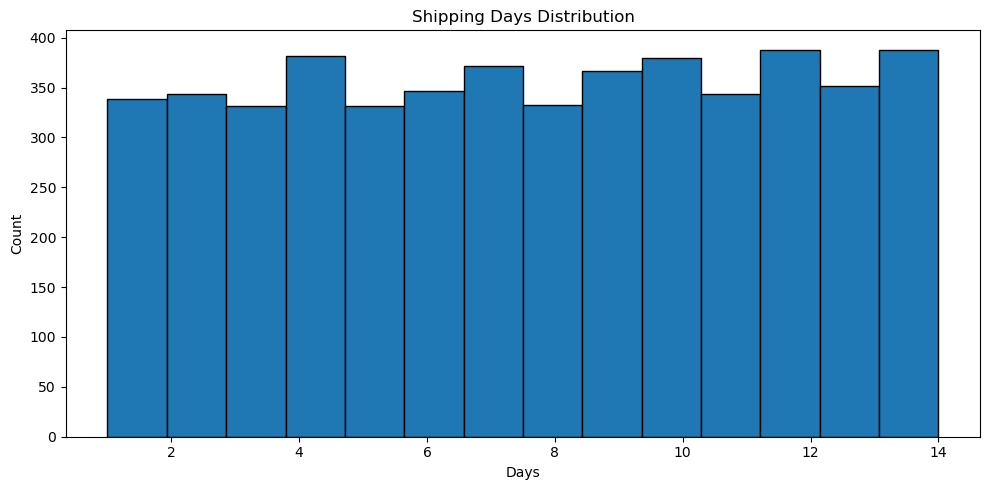

In [80]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(dt['shipping_days'], bins=14,edgecolor='black')
ax.set_title('Shipping Days Distribution')
ax.set_xlabel('Days'); ax.set_ylabel('Count')
plt.tight_layout()

plt.savefig('dist of shipping days.png', dpi=300, bbox_inches='tight')
plt.show()

### Sales per Day by Region

A boxplot compares sales efficiency across regions by analyzing sales per shipping day.


C:\Users\Owner\AppData\Local\Temp\ipykernel_15028\1678470886.py:4: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



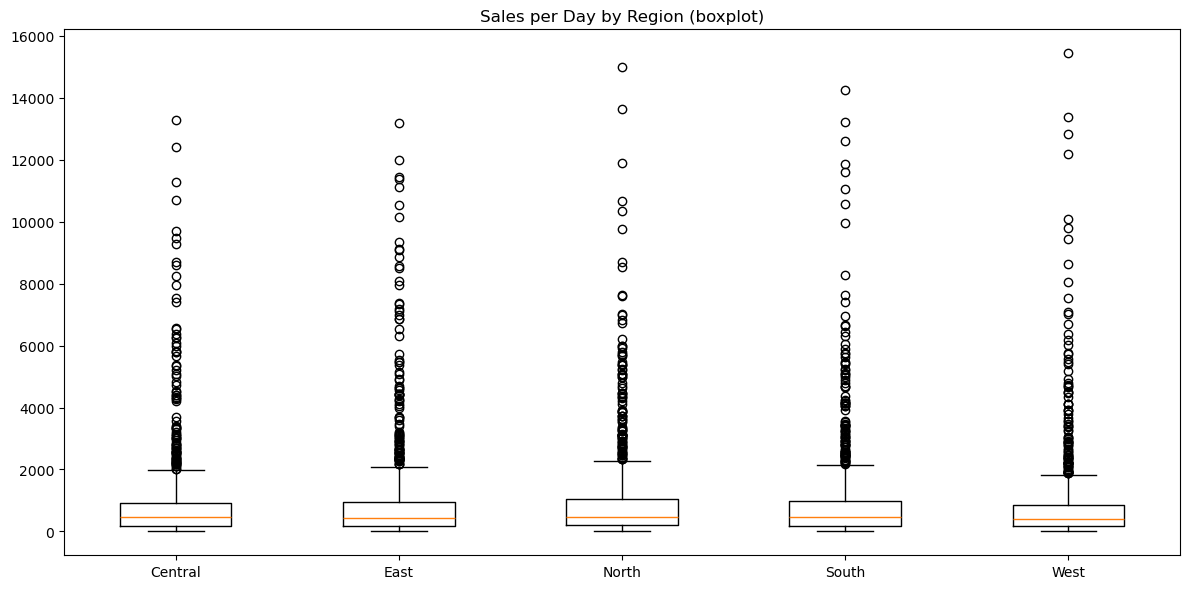

In [81]:
fig, ax = plt.subplots(figsize=(12,6))
regions = sorted(dt['region'].unique())
data_to_plot = [dt.loc[dt['region']==r, 'sales_per_day'].dropna() for r in regions]
ax.boxplot(data_to_plot, labels=regions)
ax.set_title('Sales per Day by Region (boxplot)')
plt.tight_layout()

plt.savefig('sales per day by region.png', dpi=300, bbox_inches='tight')
plt.show()

### Top Customers by Net Sales

If customer IDs are available, the top 20 customers by net sales are visualized.  
This helps identify key revenue contributors.


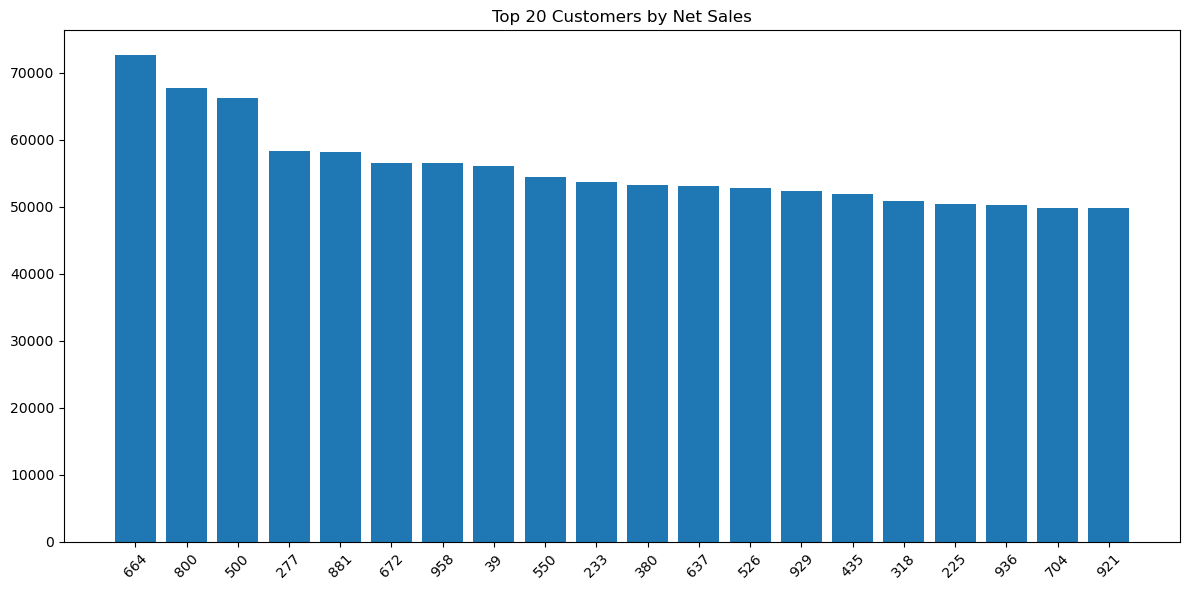

In [82]:
if 'customer_id' in dt.columns:
    top_customers = dt.groupby('customer_id').net_sales.sum().sort_values(ascending=False).head(20)
    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(range(len(top_customers)), top_customers.values)
    ax.set_xticks(range(len(top_customers)))
    ax.set_xticklabels(top_customers.index, rotation=45)
    ax.set_title('Top 20 Customers by Net Sales')
    plt.tight_layout()

plt.savefig('net sales metrics.png', dpi=300, bbox_inches='tight')
plt.show()

### Correlation Matrix of Numeric Features

A correlation matrix highlights relationships between numerical variables,  
helping detect multicollinearity and important drivers of sales and profit.


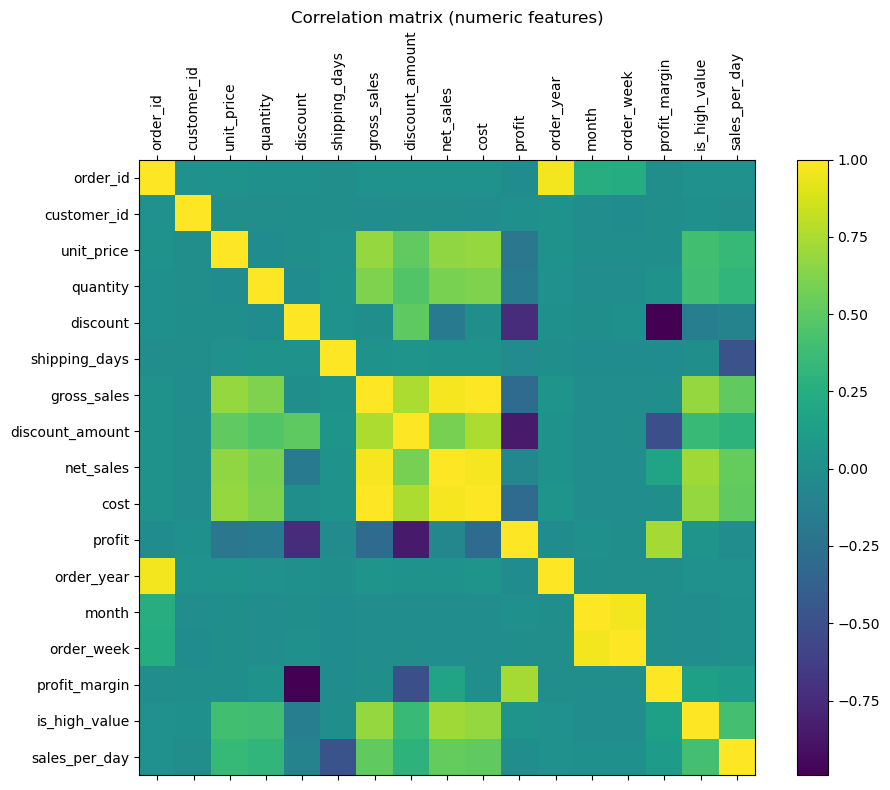

In [83]:
num = dt.select_dtypes(include=[np.number])
corr = num.corr()
fig, ax = plt.subplots(figsize=(10,8))
cax = ax.matshow(corr)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks); ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
ax.set_title('Correlation matrix (numeric features)')
plt.tight_layout()

plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### Price vs Quantity Analysis by Product Category

An interactive bubble chart visualizes:
- Average unit price  
- Average quantity sold  
- Total net sales (bubble size)


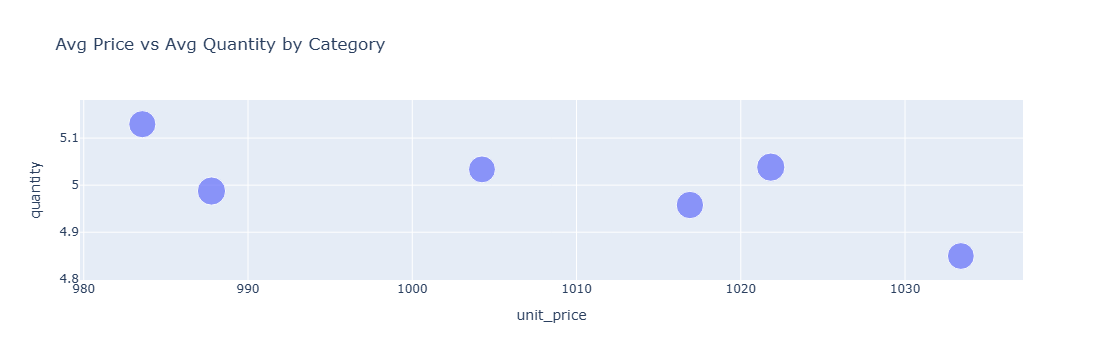

In [89]:
agg = dt.groupby('product_category').agg(unit_price=('unit_price','mean'), quantity=('quantity','mean'), net_sales=('net_sales','sum')).reset_index()
fig = px.scatter(agg, x='unit_price', y='quantity', size='net_sales', hover_name='product_category', title='Avg Price vs Avg Quantity by Category')

fig.write_html('price vs qty.png')
fig.show()

### Monthly Net Sales by Region

An interactive time-series line chart tracks net sales trends across regions over time.


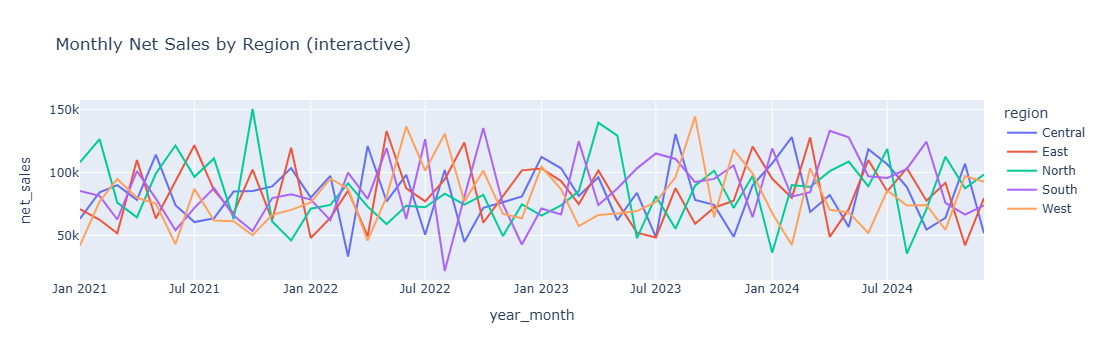

In [90]:
ts_region = dt.groupby([dt['year_month'].astype(str), 'region']).net_sales.sum().reset_index()
ts_region.columns = ['year_month','region','net_sales']
fig = px.line(ts_region, x='year_month', y='net_sales', color='region', title='Monthly Net Sales by Region (interactive)')

fig.write_html('net sales by region.html')
fig.show()